In [1]:
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt

In [2]:
response = requests.get('https://catalog.data.gov/api/3/action/package_show?id=motor-vehicle-collisions-crashes')

In [3]:
response_dict = json.loads(response.content)

In [4]:
assert response_dict['success'] is True

In [5]:
data = response_dict['result']

In [6]:
pprint.pprint(data)

{'author': None,
 'author_email': None,
 'creator_user_id': '2b785922-9f13-491b-a3c2-2a40acbd80c2',
 'extras': [{'key': 'resource-type', 'value': 'Dataset'},
            {'key': 'source_hash',
             'value': '25a6b5840df27c672779f3bf540940d71289f0d327586d11bf2eff122430b471'},
            {'key': 'source_datajson_identifier', 'value': True},
            {'key': 'source_schema_version', 'value': '1.1'},
            {'key': 'accessLevel', 'value': 'public'},
            {'key': 'identifier',
             'value': 'https://data.cityofnewyork.us/api/views/h9gi-nx95'},
            {'key': 'issued', 'value': '2021-04-19'},
            {'key': 'landingPage',
             'value': 'https://data.cityofnewyork.us/d/h9gi-nx95'},
            {'key': 'modified', 'value': '2024-04-04'},
            {'key': 'publisher', 'value': 'data.cityofnewyork.us'},
            {'key': 'theme', 'value': ['Public Safety']},
            {'key': 'catalog_@context',
             'value': 'https://project-open-

In [7]:
data_url = data['resources'][0]['url']
data_format = data['resources'][0]['format']
print('Data format:  ' + data_format)
print(data_url)
csv = ['comma-separated-values', 'CSV', 'csv']

Data format:  CSV
https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD


In [8]:
df = pd.read_csv(data_url)

C:\Users\swani\AppData\Local\Temp\ipykernel_30108\2442137398.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [9]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

## Data Cleaning

In [10]:
dc = df.drop(columns = ['LATITUDE','LONGITUDE','OFF STREET NAME','LOCATION'])


In [11]:
dc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,NaN,NaN,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [12]:
dc.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           646591
ZIP CODE                          646841
ON STREET NAME                    441316
CROSS STREET NAME                 785819
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6816
CONTRIBUTING FACTOR VEHICLE 2     322349
CONTRIBUTING FACTOR VEHICLE 3    1929608
CONTRIBUTING FACTOR VEHICLE 4    2044589
CONTRIBUTING FACTOR VEHICLE 5    2069044
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13742
VEHICLE TYPE CODE 2               397580
VEHICLE TYPE CODE 3              1934997
VEHICLE TYPE CODE 4              2045755
VEHICLE TYPE COD

In [13]:
dc = dc[~dc['VEHICLE TYPE CODE 1'].isnull()]
dc = dc[~dc['CONTRIBUTING FACTOR VEHICLE 1'].isnull()]
dc = dc[~dc['ON STREET NAME'].isnull()]
dc = dc[~dc['ZIP CODE'].isnull()]

In [14]:
dc.drop(columns = ['CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'], inplace = True)

In [15]:
dc.drop(columns = ['VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'], inplace = True)

In [16]:
dc.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
ON STREET NAME                         0
CROSS STREET NAME                    568
NUMBER OF PERSONS INJURED              3
NUMBER OF PERSONS KILLED               4
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2     154218
CONTRIBUTING FACTOR VEHICLE 3    1041906
COLLISION_ID                           0
VEHICLE TYPE CODE 1                    0
VEHICLE TYPE CODE 2               174246
VEHICLE TYPE CODE 3              1043096
dtype: int64

In [17]:
dc['CROSS STREET NAME'].fillna('No Street Involved', inplace = True)

In [18]:
dc['CONTRIBUTING FACTOR VEHICLE 2'].fillna('No Car Involved', inplace = True)

In [19]:
dc['CONTRIBUTING FACTOR VEHICLE 3'].fillna('No Car Involved', inplace = True)

In [20]:
dc['VEHICLE TYPE CODE 2'].fillna('No Car Type', inplace = True)
dc['VEHICLE TYPE CODE 3'].fillna('No Car Type', inplace = True)

In [21]:
dc.fillna(0, inplace = True)

In [22]:
print(dc.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
dtype: object


In [23]:
dc.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
dtype: int64

In [24]:
dc

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
9,12/14/2021,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,0,Passing Too Closely,Unspecified,No Car Involved,4486519,Sedan,Station Wagon/Sport Utility Vehicle,No Car Type
11,12/14/2021,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,0,Turning Improperly,Unspecified,No Car Involved,4487127,Sedan,Station Wagon/Sport Utility Vehicle,No Car Type
14,12/14/2021,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,...,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,No Car Involved,4486635,Sedan,Sedan,No Car Type
18,12/11/2021,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,...,0,1,0,Unspecified,Unspecified,No Car Involved,4487040,Station Wagon/Sport Utility Vehicle,Sedan,No Car Type
22,12/13/2021,6:30,QUEENS,11372.0,82 STREET,34 AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,4486967,Sedan,No Car Type,No Car Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078128,04/02/2024,18:15,BROOKLYN,11215.0,8 AVENUE,13 STREET,0.0,0.0,0,0,...,0,0,0,Turning Improperly,Unspecified,No Car Involved,4714374,Station Wagon/Sport Utility Vehicle,Box Truck,No Car Type
2078130,04/02/2024,20:50,QUEENS,11372.0,35 AVENUE,89 STREET,1.0,0.0,1,0,...,0,0,0,Failure to Yield Right-of-Way,No Car Involved,No Car Involved,4714872,Station Wagon/Sport Utility Vehicle,No Car Type,No Car Type
2078131,03/28/2024,16:00,QUEENS,11691.0,GATEWAY BOULEVARD,NEW HAVEN AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,4714823,Station Wagon/Sport Utility Vehicle,No Car Type,No Car Type
2078132,04/02/2024,15:04,STATEN ISLAND,10312.0,LAMOKA AVENUE,WAINWRIGHT AVENUE,1.0,0.0,0,0,...,0,1,0,Unspecified,Unspecified,No Car Involved,4714492,Sedan,Sedan,No Car Type


In [25]:
dc['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                      305579
Sedan                                  237665
Station Wagon/Sport Utility Vehicle    181226
SPORT UTILITY / STATION WAGON          132164
TAXI                                    27945
                                        ...  
st                                          1
TIR                                         1
ROAD                                        1
COMMU                                       1
nyc                                         1
Name: VEHICLE TYPE CODE 1, Length: 887, dtype: int64

In [26]:
filtered_df = dc[dc['VEHICLE TYPE CODE 1'].isin(['Sedan', 'Station Wagon/Sport Utility Vehicle'])]

In [27]:
filtered_df['VEHICLE TYPE CODE 1'].replace({'Sedan': 0, 'Station Wagon/Sport Utility Vehicle': 1}, inplace=True)
filtered_df

C:\Users\swani\AppData\Local\Temp\ipykernel_30108\193051834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['VEHICLE TYPE CODE 1'].replace({'Sedan': 0, 'Station Wagon/Sport Utility Vehicle': 1}, inplace=True)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
9,12/14/2021,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,0,Passing Too Closely,Unspecified,No Car Involved,4486519,0,Station Wagon/Sport Utility Vehicle,No Car Type
11,12/14/2021,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,0,Turning Improperly,Unspecified,No Car Involved,4487127,0,Station Wagon/Sport Utility Vehicle,No Car Type
14,12/14/2021,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,...,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,No Car Involved,4486635,0,Sedan,No Car Type
18,12/11/2021,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,...,0,1,0,Unspecified,Unspecified,No Car Involved,4487040,1,Sedan,No Car Type
22,12/13/2021,6:30,QUEENS,11372.0,82 STREET,34 AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,4486967,0,No Car Type,No Car Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078128,04/02/2024,18:15,BROOKLYN,11215.0,8 AVENUE,13 STREET,0.0,0.0,0,0,...,0,0,0,Turning Improperly,Unspecified,No Car Involved,4714374,1,Box Truck,No Car Type
2078130,04/02/2024,20:50,QUEENS,11372.0,35 AVENUE,89 STREET,1.0,0.0,1,0,...,0,0,0,Failure to Yield Right-of-Way,No Car Involved,No Car Involved,4714872,1,No Car Type,No Car Type
2078131,03/28/2024,16:00,QUEENS,11691.0,GATEWAY BOULEVARD,NEW HAVEN AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,4714823,1,No Car Type,No Car Type
2078132,04/02/2024,15:04,STATEN ISLAND,10312.0,LAMOKA AVENUE,WAINWRIGHT AVENUE,1.0,0.0,0,0,...,0,1,0,Unspecified,Unspecified,No Car Involved,4714492,0,Sedan,No Car Type


In [28]:
filtered_df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1                int64
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
dtype: object

In [29]:
filtered_df.drop(columns= [
    'CRASH DATE',
    'CRASH TIME',
    'ON STREET NAME',
    'CROSS STREET NAME',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'COLLISION_ID',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3'
], inplace= True)

C:\Users\swani\AppData\Local\Temp\ipykernel_30108\3183222210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns= [


In [30]:
filtered_df

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,VEHICLE TYPE CODE 1
9,MANHATTAN,10017.0,0.0,0.0,0,0,0,0,0,0,0
11,QUEENS,11413.0,0.0,0.0,0,0,0,0,0,0,0
14,QUEENS,11434.0,2.0,0.0,0,0,0,0,2,0,0
18,BRONX,10463.0,1.0,0.0,0,0,0,0,1,0,1
22,QUEENS,11372.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2078128,BROOKLYN,11215.0,0.0,0.0,0,0,0,0,0,0,1
2078130,QUEENS,11372.0,1.0,0.0,1,0,0,0,0,0,1
2078131,QUEENS,11691.0,0.0,0.0,0,0,0,0,0,0,1
2078132,STATEN ISLAND,10312.0,1.0,0.0,0,0,0,0,1,0,0


In [31]:
borough_mapping = {
    'MANHATTAN': 1,
    'QUEENS': 2,
    'BROOKLYN': 3,
    'BRONX': 4,
    'STATEN ISLAND': 5
}
filtered_df['BOROUGH'] = filtered_df['BOROUGH'].map(borough_mapping)
filtered_df




C:\Users\swani\AppData\Local\Temp\ipykernel_30108\646131772.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BOROUGH'] = filtered_df['BOROUGH'].map(borough_mapping)


,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,VEHICLE TYPE CODE 1
9,1,10017.0,0.0,0.0,0,0,0,0,0,0,0
11,2,11413.0,0.0,0.0,0,0,0,0,0,0,0
14,2,11434.0,2.0,0.0,0,0,0,0,2,0,0
18,4,10463.0,1.0,0.0,0,0,0,0,1,0,1
22,2,11372.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2078128,3,11215.0,0.0,0.0,0,0,0,0,0,0,1
2078130,2,11372.0,1.0,0.0,1,0,0,0,0,0,1
2078131,2,11691.0,0.0,0.0,0,0,0,0,0,0,1
2078132,5,10312.0,1.0,0.0,0,0,0,0,1,0,0


In [32]:
numeric_columns = ['BOROUGH',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
] 

X = filtered_df[numeric_columns]
Y = filtered_df['VEHICLE TYPE CODE 1']

X.shape, Y.shape

((418891, 5), (418891,))

In [33]:
## Importing necessary libraries..
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
def GNB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")
    
    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = gnb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.57      0.91      0.70    190227
           1       0.47      0.10      0.17    144885

    accuracy                           0.56    335112
   macro avg       0.52      0.51      0.44    335112
weighted avg       0.53      0.56      0.47    335112



Accuracy Score:

56.225083%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.57      0.91      0.70     47438
           1       0.47      0.10      0.17     36341

    accuracy                           0.56     83779
   macro avg       0.52      0.51      0.43     83779
weighted avg       0.52      0.56      0.47     83779



Accuracy Score:

55.968680%



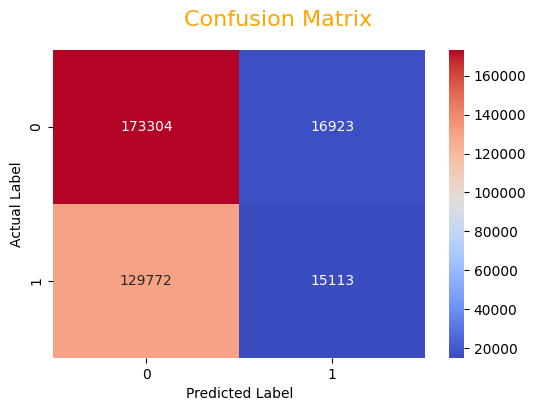

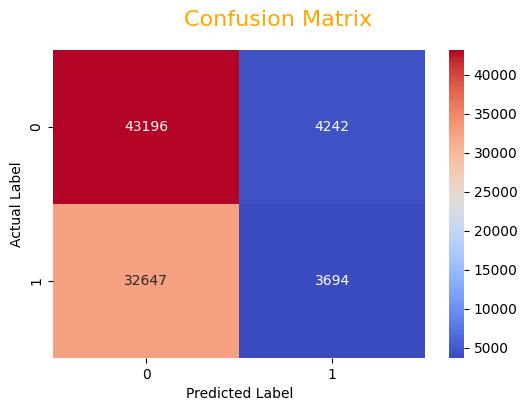

In [35]:
GNB_model(X, Y)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
def DT_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = dt.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = dt.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.57      0.98      0.72    190227
           1       0.51      0.02      0.04    144885

    accuracy                           0.57    335112
   macro avg       0.54      0.50      0.38    335112
weighted avg       0.55      0.57      0.43    335112



Accuracy Score:

56.817124%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.57      0.98      0.72     47438
           1       0.50      0.02      0.04     36341

    accuracy                           0.57     83779
   macro avg       0.53      0.50      0.38     83779
weighted avg       0.54      0.57      0.43     83779



Accuracy Score:

56.628749%



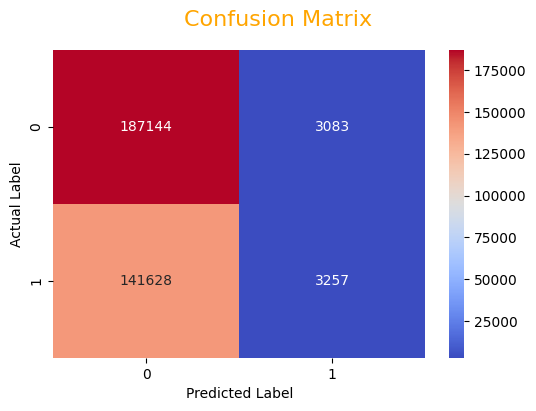

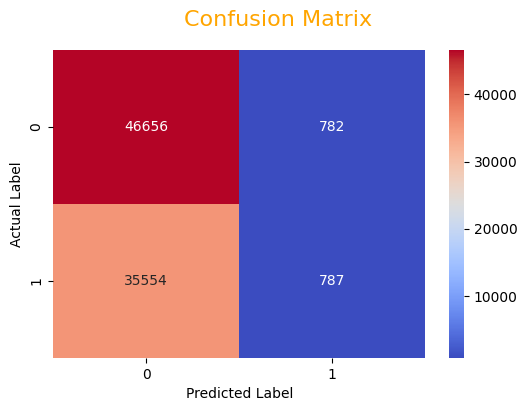

In [38]:
DT_model(X, Y)